In [6]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [17]:
from dataclasses import dataclass, field

@dataclass
class Cfg:
    results_directory = "/Volumes/TIZIANO/results/corr/50Hz_180stim_10sec_100iter_0MNN"
    fs_new = 50
    subjects = range(3,11)
    model = "ViTPose"
    rois = ["occ", "par", "tem", "fro"]
cfg = Cfg()

In [34]:
rois_dict = {roi: [] for roi in cfg.rois}
for isub in cfg.subjects:
    for iroi in cfg.rois:
        fn2load = f'{cfg.results_directory}/sub{isub:03d}/dRSA_corr_sub{isub:03d}_{imod}_{iroi}_rep{irep}_{cfg.fs_new}Hz.mat'
        # res = loadmat("/Volumes/TIZIANO/results/corr/50Hz_180stim_10sec_100iter_0MNN/sub003/dRSA_corr_sub003_ViTPose_occ_rep1_50Hz.mat")
        res = loadmat(fn2load)
        # res["latencytime"].squeeze(), 
        idx = np.argmax(res["dRSA"].squeeze()[100:-100])
        lattime = res["latencytime"].squeeze()[100:-100]
        pl = lattime[idx]
        rois_dict[iroi].append(pl)


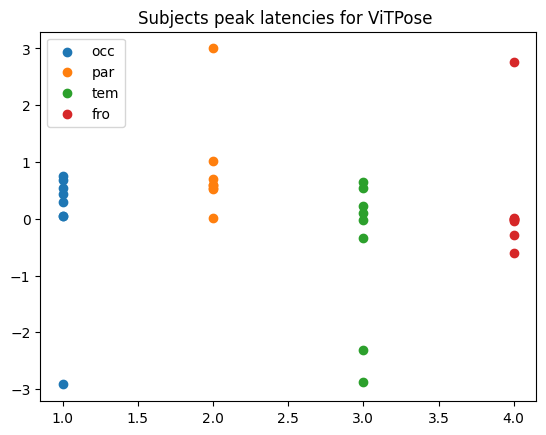

In [42]:
plt.scatter(np.ones(len(rois_dict["occ"])), rois_dict["occ"], label="occ");
plt.scatter(np.ones(len(rois_dict["occ"]))*2, rois_dict["par"], label="par");
plt.scatter(np.ones(len(rois_dict["occ"]))*3, rois_dict["tem"], label="tem");
plt.scatter(np.ones(len(rois_dict["occ"]))*4, rois_dict["fro"], label="fro");
# plt.hist(rois_dict["par"]);
# plt.hist(rois_dict["tem"]);
# plt.hist(rois_dict["fro"]);
plt.title("Subjects peak latencies for ViTPose ")
plt.legend()